In [8]:
library(tidyverse)
library(dslabs)

Warning message:
"package 'dslabs' was built under R version 3.6.3"

The following plots help to examine how well correlated two variables are.

# Scatter plot

The most frequently used plot for data analysis is undoubtedly the scatterplot. Whenever you want to understand the nature of relationship between two variables, invariably the first choice is the scatterplot.

In [12]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


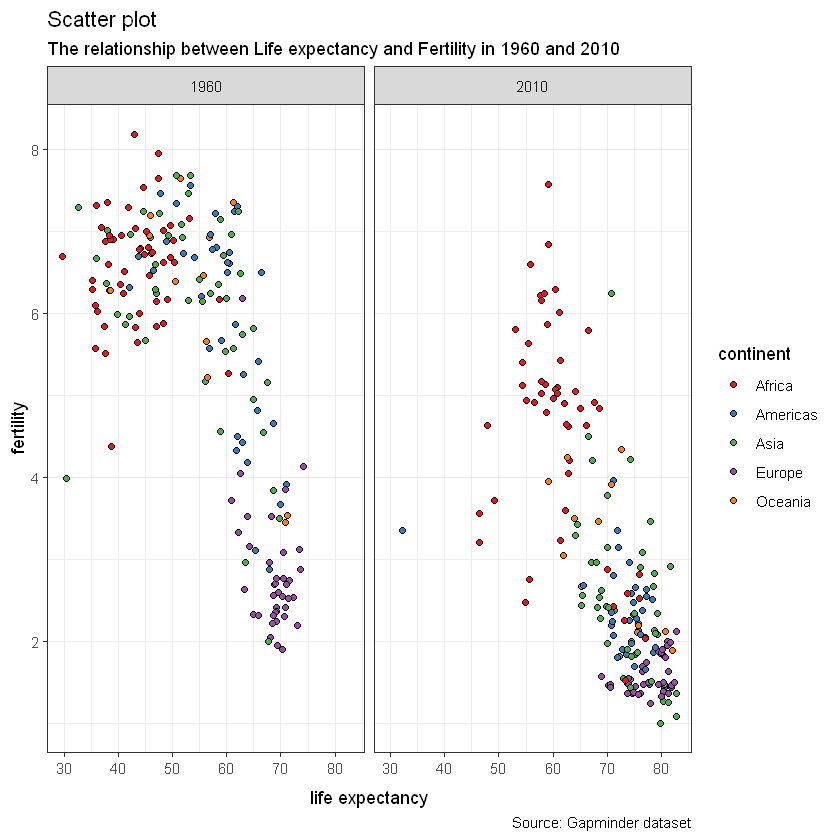

In [32]:
#The relationship between life expectancy and fertility in 1960 and 2010
gapminder %>%
filter(year %in% c(1960, 2010)) %>%
ggplot(aes(life_expectancy, fertility, fill = continent)) +
geom_point(shape = 21, color = 'black') +
facet_wrap(~ year) +
scale_fill_brewer(palette = 'Set1') +
labs(x = 'life expectancy',
     title = 'Scatter plot',
     subtitle = 'The relationship between Life expectancy and Fertility in 1960 and 2010',
     caption = 'Source: Gapminder dataset') +
theme_bw()

You can also add a regression line

`geom_smooth()` using formula 'y ~ x'


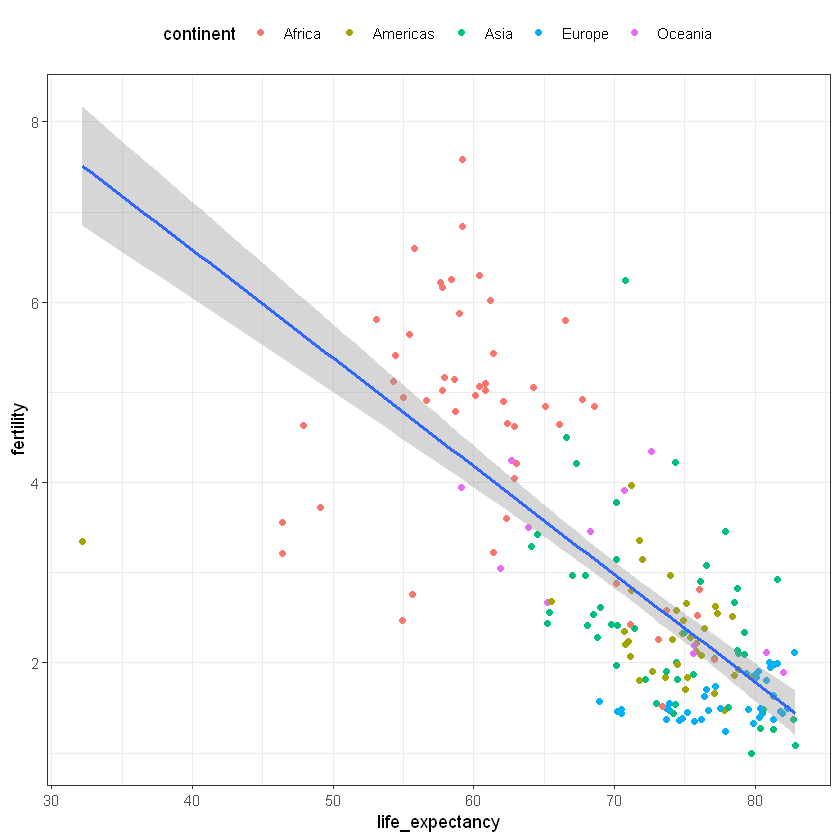

In [23]:
#The relationship between life expectancy and fertility in 2010
gapminder %>%
filter(year == 2010) %>%
ggplot(aes(life_expectancy, fertility)) +
geom_point(aes(color = continent)) +
geom_smooth(method = 'lm') +
theme_bw() + 
theme(legend.position = 'top',
      legend.direction = 'horizontal')

# Scatter plot with Encircling

When presenting the results, sometimes I would encirlce certain special group of points or region in the chart so as to draw the attention to those peculiar cases. This can be conveniently done using the `geom_encircle()` in `ggalt` package.

In [33]:
library(ggalt)

Warning message:
"package 'ggalt' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2


In [25]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


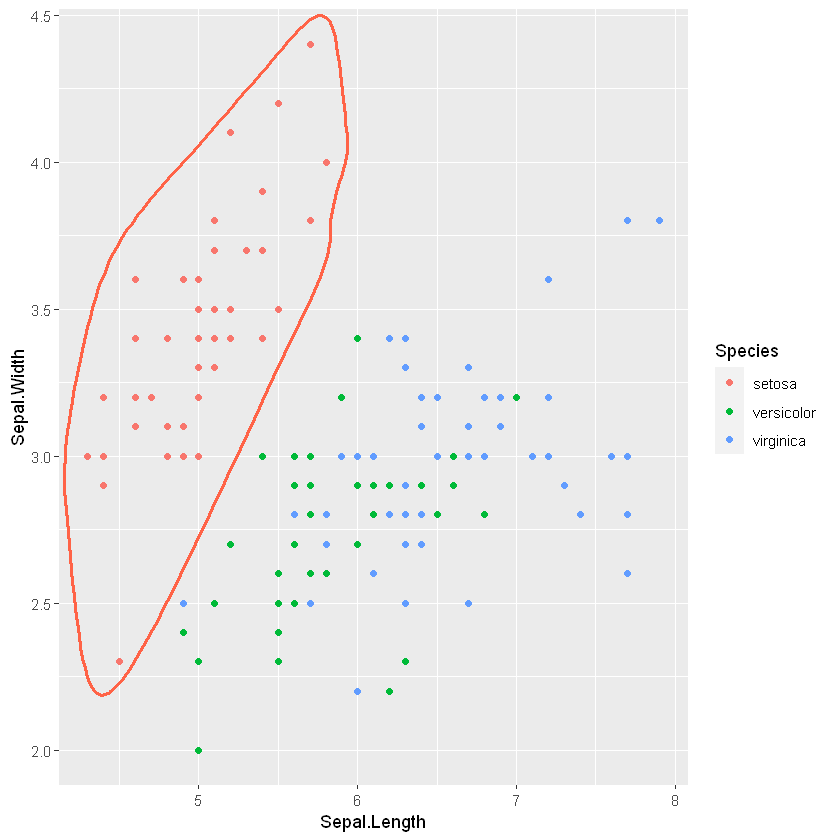

In [37]:
iris %>%
ggplot(aes(Sepal.Length, Sepal.Width, color = Species)) + 
geom_point() +
geom_encircle(data = filter(iris, Species == 'setosa'),
              mapping = aes(Sepal.Length, Sepal.Width),
              color = 'tomato', size = 3)

# Jitter Plot

Handling overlapping points

In [39]:
library(titanic)

Warning message:
"package 'titanic' was built under R version 3.6.3"

In [40]:
head(titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


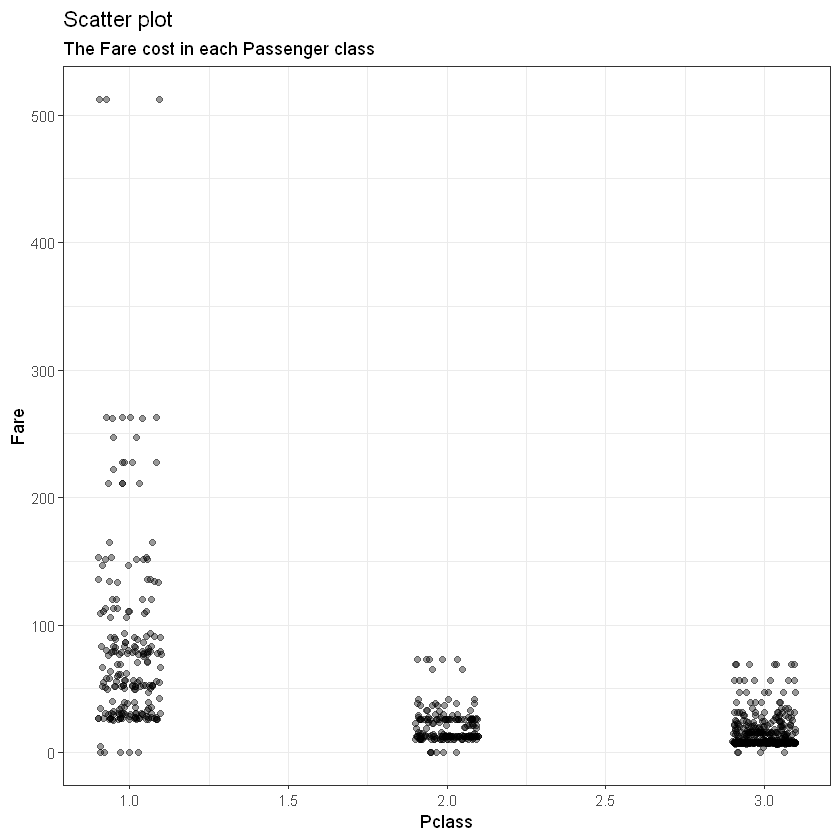

In [48]:
titanic_train %>%
ggplot(aes(Pclass, Fare)) + 
geom_jitter(width = .1, alpha = .4) +
ggtitle('Scatter plot', 'The Fare cost in each Passenger class') + 
theme_bw()

# Counts Chart

The second option to overcome the problem of data points overlap is to use what is called a counts chart. Whereever there is more points overlap, the size of the circle gets bigger.

In [61]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


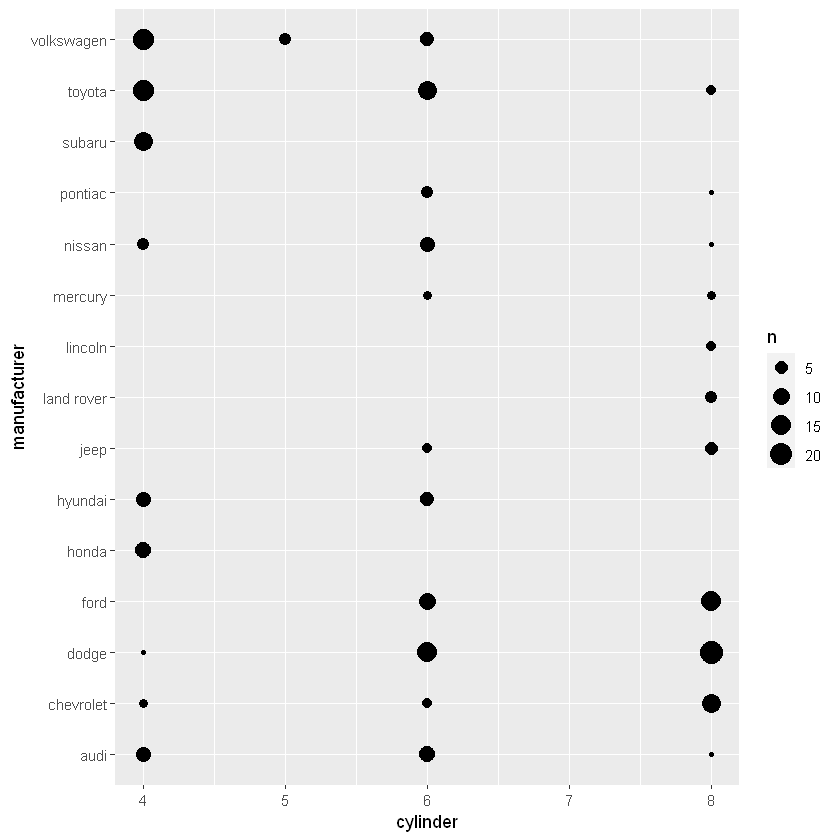

In [65]:
mpg %>%
ggplot(aes(cyl, manufacturer)) +
geom_count() + 
xlab('cylinder')

# Bubble Chart

While scatterplot lets you compare the relationship between 2 continuous variables, bubble chart serves well if you want to understand relationship within the underlying groups based on:

* A Categorical variable (by changing the color)
* Another continuous variable (by changing the size of points).  

In simpler words, bubble charts are more suitable if you have 4-Dimensional data where two of them are numeric (X and Y) and one other categorical (color) and another numeric variable (size).

In [55]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


Warning message:
"Removed 90 rows containing missing values (geom_point)."

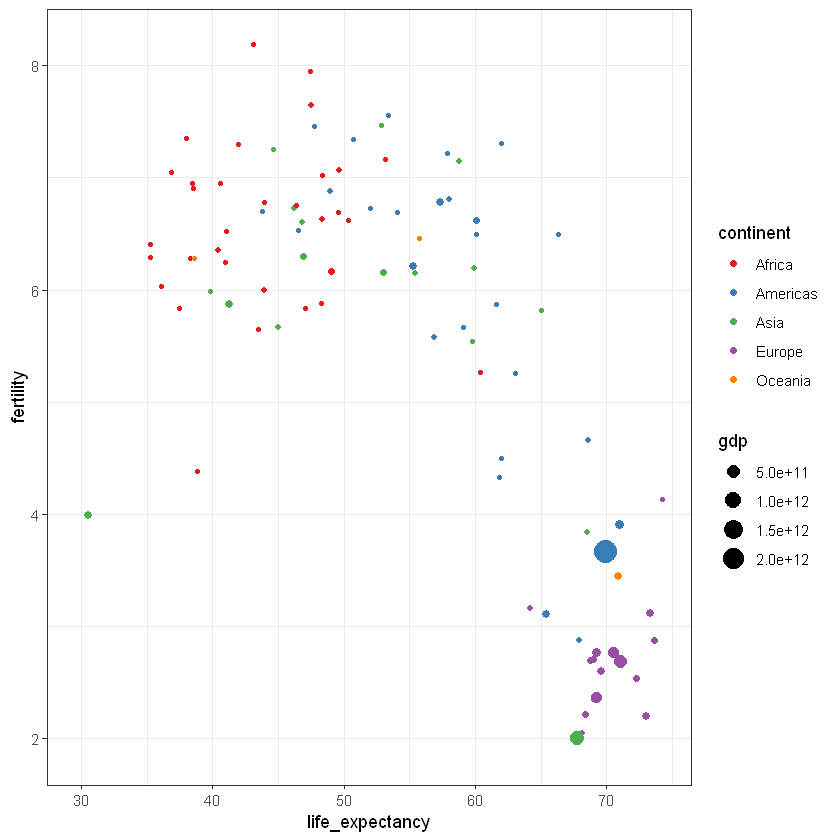

In [60]:
#The relationship between life expectancy and fertility in 1960 
#Highlight different continents by color and gdp of each country by the size of point
gapminder %>%
filter(year == 1960) %>%
ggplot(aes(life_expectancy, fertility, color = continent, size = gdp)) + 
geom_point() +
scale_color_brewer(palette = 'Set1') +
theme_bw()

# Animated Bubble Chart

An animated bubble chart can be implemented using the `gganimate` package. It is same as the bubble chart, but, you have to show how the values change over a fifth dimension (typically time).

The key thing to do is to set the `aes(frame)` to the desired column on which you want to animate. Rest of the procedure related to plot construction is the same. Once the plot is constructed, you can animate it using `gganimate()` by setting a chosen interval.

In [68]:
library(gganimate)

Warning message:
"package 'gganimate' was built under R version 3.6.3"No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session


In [69]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [74]:
gapminder %>%
ggplot(aes(gdp, life_expectancy)) +
geom_point() +
scale_x_log10() +
transition_time(year)


Warning message:
"Removed 90 rows containing missing values (geom_point)."Warning message:
"Removed 90 rows containing missing values (geom_point)."Warning message:
Rendering [>-------------------------------------------] at 8.8 fps ~ eta: 11sWarning message:
Rendering [>-------------------------------------------] at 5.4 fps ~ eta: 18sWarning message:
Rendering [=>------------------------------------------] at 4.9 fps ~ eta: 20sWarning message:
Rendering [=>------------------------------------------] at 5.2 fps ~ eta: 18sWarning message:
Rendering [==>-----------------------------------------] at 5.4 fps ~ eta: 17sWarning message:
Rendering [==>-----------------------------------------] at 5.8 fps ~ eta: 16sWarning message:
Rendering [===>------------------------------------------] at 6 fps ~ eta: 15sWarning message:
Rendering [===>----------------------------------------] at 6.2 fps ~ eta: 15sWarning message:
Rendering [===>----------------------------------------] at 6.5 fps ~ eta: 

Rendering [=======================================>----] at 9.2 fps ~ eta:  1sWarning message:
"Removed 17 rows containing missing values (geom_point)."Warning message:
Rendering [=======================================>----] at 9.3 fps ~ eta:  1sWarning message:
Rendering [========================================>---] at 9.3 fps ~ eta:  1sWarning message:
"Removed 185 rows containing missing values (geom_point)."Warning message:
Rendering [=========================================>--] at 9.3 fps ~ eta:  1sWarning message:
Rendering [=========================================>--] at 9.4 fps ~ eta:  0sWarning message:
Rendering [==========================================>-] at 9.4 fps ~ eta:  0sWarning message:
"Removed 185 rows containing missing values (geom_point)."Warning message:
Rendering [===========================================>] at 9.5 fps ~ eta:  0sWarning message:


  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

# Marginal Histogram

In [77]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [78]:
tips <- read.csv('./tips.csv')
head(tips)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


`geom_smooth()` using formula 'y ~ x'


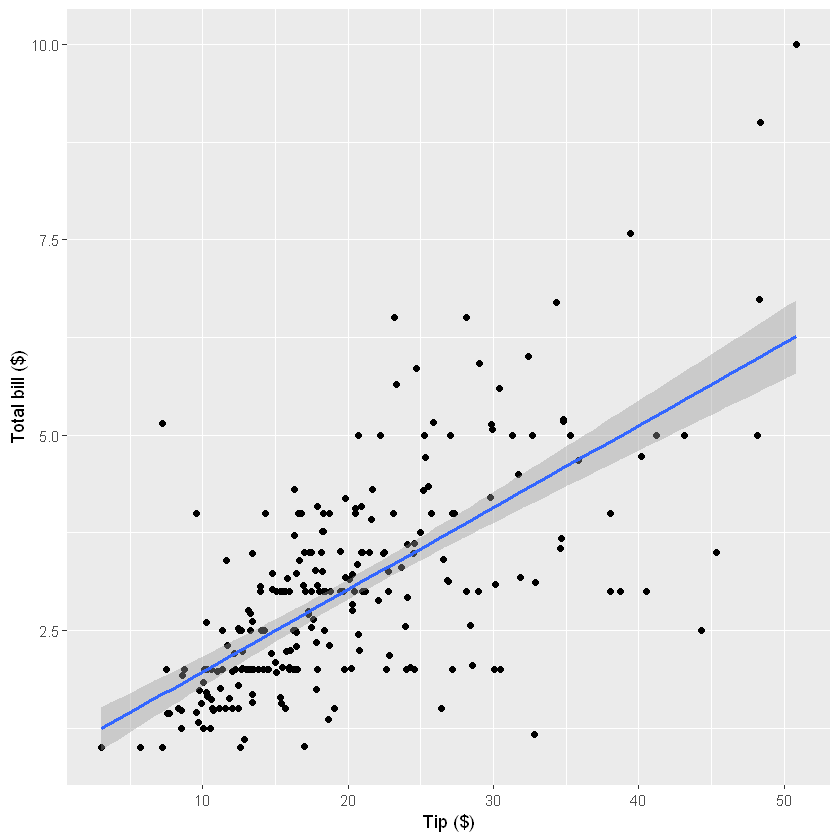

In [86]:
tips %>%
ggplot(aes(total_bill, tip)) + 
geom_point() +
geom_smooth(method = 'lm') + 
labs(x = 'Tip ($)', y = 'Total bill ($)')

# Correlogram

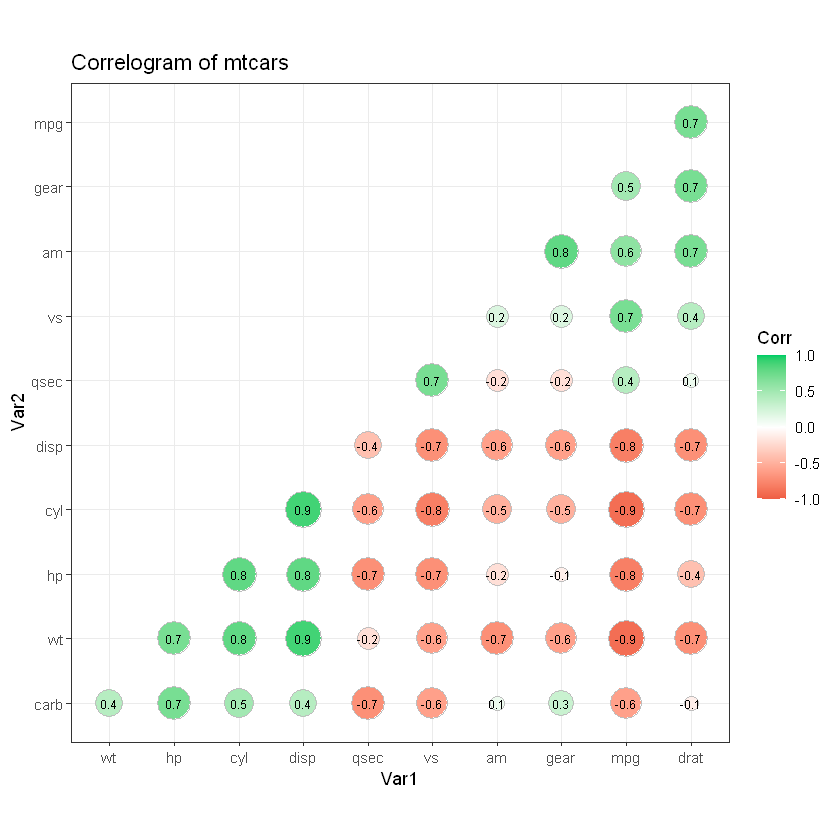

In [96]:
# devtools::install_github("kassambara/ggcorrplot")
library(ggplot2)
library(ggcorrplot)

# Correlation matrix
data(mtcars)
corr <- round(cor(mtcars), 1)

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = T,        #Show label 
           lab_size = 2.5,   #The size of the label 
           method="circle",#Usuing circle for each point
           colors = c("tomato2", "white", "springgreen3")) +
ggtitle("Correlogram of mtcars") + 
theme_bw()

Correlogram let’s you examine the corellation of multiple continuous variables present in the same dataframe. This is conveniently implemented using the `ggcorrplot` package.